In [23]:
from lifelines import CoxPHFitter, datasets
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'var': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E')
cph.print_summary()
cph.predict_median(df)

0     5.0
1     4.0
2     9.0
3     8.0
4     8.0
5     5.0
6     5.0
7     4.0
8     2.0
9     6.0
10    6.0
11    7.0
Name: 0.5, dtype: float64

In [4]:
df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'var': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2],
    'weights': [1.1, 0.5, 2.0, 1.6, 1.2, 4.3, 1.4, 4.5, 3.0, 3.2, 0.4, 6.2],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E', strata=['month', 'age'], robust=True, weights_col='weights')
cph.print_summary()
cph.predict_median(df)

c:\users\greggazz\anaconda3\envs\tf\lib\site-packages\lifelines\fitters\coxph_fitter.py:697: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.793. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  ConvergenceWarning,


model,lifelines.CoxPHFitter
duration col,'T'
event col,'E'
weights col,'weights'
robust variance,True
strata,"[month, age]"
baseline estimation,breslow
number of observations,29.4
number of events observed,17.3
partial log-likelihood,-16.25
time fit was run,2020-06-04 12:56:42 UTC


0     5.0
1     3.0
2     9.0
3     8.0
4     7.0
5     4.0
6     4.0
7     inf
8     2.0
9     5.0
10    6.0
11    inf
Name: 0.5, dtype: float64

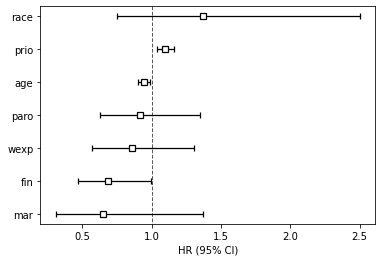

In [12]:
rossi = datasets.load_rossi()
cph = CoxPHFitter().fit(rossi, duration_col = 'week', event_col = 'arrest')
cph.plot(hazard_ratios=True)

In [9]:
cph.print_summary()

In [60]:
print(rossi.shape)
rossi.head(320)[316:]

(432, 10)


,week,arrest,fin,age,race,wexp,mar,paro,prio,prio**2
316,11,1,0,19,1,0,0,0,18,324
317,52,0,0,18,1,0,0,1,3,9
318,52,0,1,38,0,1,0,1,2,4
319,52,0,1,18,0,0,0,1,6,36


- 432 samples, 8 features, 1 survival_time (week), 1 event (arrest)

In [57]:
df_surival_functions.tail(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431
52.0,0.745144,0.634443,0.587022,0.75384,0.712053,0.74921,0.77278,0.712508,0.684819,0.748394,0.739961,0.820036,0.677436,0.808263,0.707049,0.738894,0.653837,0.71792,0.629828,0.758793,0.713206,0.847818,0.773529,0.777779,0.753438,0.722777,0.799708,0.712297,0.701257,0.666925,0.723896,0.723015,0.841124,0.744095,0.739315,0.728236,0.707262,0.76405,0.689891,0.75958,0.725856,0.758793,0.573723,0.728904,0.712298,0.728904,0.566815,0.712962,0.787141,0.781961,0.819422,0.748802,0.795478,0.627885,0.777779,0.778514,0.799708,0.759399,0.748394,0.771481,0.666181,0.738894,0.696327,0.710722,0.744094,0.75464,0.733838,0.738894,0.791868,0.712508,0.7241,0.728035,0.759187,0.759973,0.71792,0.837957,0.723659,0.827524,0.723456,0.701257,0.745556,0.769211,0.641417,0.660307,0.614876,0.748802,0.734692,0.70751,0.718127,0.739541,0.800715,0.74368,0.728236,0.749429,0.75424,0.712508,0.72847,0.701257,0.739541,0.758793,0.834733,0.787141,0.734036,0.723015,0.72847,0.781961,0.666181,0.74368,0.72847,0.734692,0.672482,0.734036,0.71792,0.786786,0.77278,0.748802,0.739315,0.683841,0.827229,0.739121,0.690854,0.74368,0.74921,0.595791,0.812261,0.749617,0.782322,0.654359,0.733608,0.70751,0.702193,0.76405,0.706587,0.702193,0.739541,0.712752,0.695853,0.744922,0.608391,0.745334,0.614876,0.647808,0.728035,0.712298,0.758793,0.750023,0.729771,0.722573,0.712752,0.79582,0.76845,0.831163,0.7387,0.738473,0.795478,0.763663,0.739121,0.791171,0.812896,0.70956,0.647808,0.72847,0.742052,0.79582,0.75958,0.733608,0.659791,0.695853,0.689409,0.820812,0.750429,0.622401,0.760184,0.667198,0.728236,0.614876,0.733838,0.684819,0.712298,0.62873,0.796687,0.685307,0.816185,0.760184,0.823213,0.734266,0.733838,0.791171,0.609528,0.773903,0.739541,0.758793,0.74368,0.728904,0.68433,0.753438,0.74921,0.763663,0.723015,0.71792,0.7068,0.758793,0.683841,0.730203,0.689891,0.73318,0.77278,0.723015,0.744731,0.759005,0.738473,0.778344,0.75504,0.750023,0.804369,0.690595,0.734266,0.729104,0.782322,0.759187,0.808587,0.738473,0.734036,0.733608,0.733838,0.717921,0.707049,0.76405,0.706338,0.763663,0.672482,0.695597,0.660307,0.648581,0.744317,0.750023,0.723456,0.754456,0.758793,0.764437,0.738894,0.56863,0.723015,0.738473,0.68433,0.748802,0.647808,0.723456,0.74368,0.701257,0.76845,0.744095,0.718127,0.685044,0.788746,0.778711,0.826934,0.76845,0.781961,0.764437,0.7068,0.739121,0.696327,0.60095,0.748802,0.701257,0.795478,0.75424,0.723456,0.8119

(49, 432)


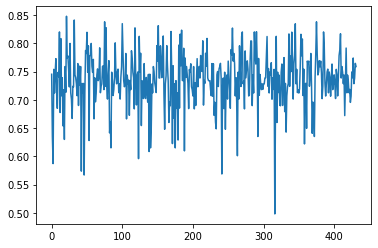

In [52]:
df_surival_functions = cph.predict_survival_function(rossi.iloc[0:])
print(df_surival_functions.shape)
df_surival_functions.tail(1)
res =plt.plot((df_surival_functions.tail(1).columns), df_surival_functions.tail(1).values[0].tolist())

In [56]:
min(df_surival_functions.tail(1).values[0].tolist())

0.4979919719486662

In [29]:
rossi.arrest.value_counts()

0    318
1    114
Name: arrest, dtype: int64

Kaplermeier curve useful for entire dataset...

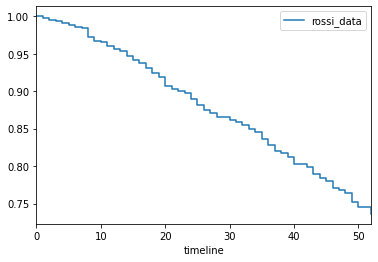

In [64]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter(label="rossi_data")
kmf.fit(rossi['week'], rossi['arrest'])
## Create an estimate
kmf.plot(ci_show=False)

### Survival curve S(t) == P(T > t) for individual subjects!
#### The output of the trained model for the following subject: 
- Survival probabilities given the features trained on this individual (sample '0')

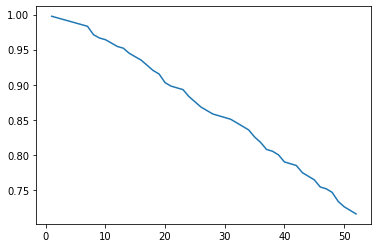

In [18]:
plt.plot(df_surival_functions.index.values, df_surival_functions[df_surival_functions.columns[0]])

No handles with labels found to put in legend.


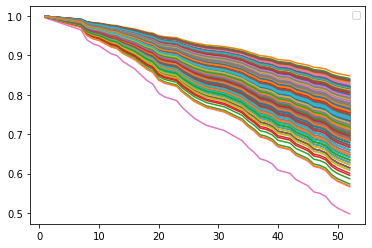

In [55]:
#for i in range(df_surival_functions.columns):
    

res = plt.plot(df_surival_functions.index.values, df_surival_functions[df_surival_functions.columns[:]])
plt.legend()

In [ ]:
- The output of this model can be used 

In [30]:
cph.predict_median(rossi)

0       inf
1      46.0
2      44.0
3       inf
4       inf
5       inf
6       inf
7       inf
8       inf
9       inf
10      inf
11      inf
12      inf
13      inf
14      inf
15      inf
16     48.0
17      inf
18     45.0
19      inf
20      inf
21      inf
22      inf
23      inf
24      inf
25      inf
26      inf
27      inf
28      inf
29      inf
30      inf
31      inf
32      inf
33      inf
34      inf
35      inf
36      inf
37      inf
38      inf
39      inf
40      inf
41      inf
42     32.0
43      inf
44      inf
45      inf
46     37.0
47      inf
48      inf
49      inf
50      inf
51      inf
52      inf
53      inf
54      inf
55      inf
56      inf
57      inf
58      inf
59      inf
60     50.0
61      inf
62      inf
63      inf
64      inf
65      inf
66      inf
67      inf
68      inf
69      inf
70      inf
71      inf
72      inf
73      inf
74      inf
75      inf
76      inf
77      inf
78      inf
79      inf
80      inf
81      inf
82      inf
83  

In [20]:
cph.predict_partial_hazard(rossi)

0      1.219126
1      3.230250
2      3.031058
3      0.487712
4      1.214025
         ...   
427    0.416973
428    1.517713
429    0.579426
430    0.935629
431    0.710516
Length: 432, dtype: float64

#### *What is a subject’s new survival function given I know the subject has lived past time s?*

In [24]:
# filter down to just censored subjects to predict remaining survival
censored_subjects = rossi.loc[~rossi['arrest'].astype(bool)]
censored_subjects_last_obs = censored_subjects['week']

cph.predict_survival_function(censored_subjects, times=[5., 25., 50.], conditional_after=censored_subjects_last_obs)
#cph.predict_median(censored_subjects, conditional_after=censored_subjects_last_obs)

,3,4,5,7,8,9,10,11,13,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,48,49,50,51,52,54,55,56,57,58,59,61,62,63,65,66,67,69,70,71,72,73,74,75,77,78,81,82,83,85,86,88,89,90,91,92,93,94,96,97,98,99,102,104,107,108,109,110,111,112,113,114,115,116,117,119,120,122,123,124,125,126,127,128,129,131,132,134,135,136,137,139,141,142,144,145,146,147,148,150,151,152,154,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,174,175,176,177,178,179,181,182,184,185,186,187,188,189,190,191,192,193,195,196,197,198,199,200,202,205,206,207,208,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,226,227,231,233,234,236,237,238,239,240,242,243,246,247,248,250,251,252,253,254,255,256,257,259,261,262,264,265,266,267,269,273,274,275,276,277,278,279,280,281,282,283,287,288,289,290,292,294,295,296,297,298,300,301,303,304,305,306,308,309,310,311,312,317,318,319,320,322,325,326,328,329,331,333,335,336,339,340,341,343,344,345,347,348,352,353,354,355,357,359,363,364,366,367,368,369,370,371,372,374,375,376,377,378,379,380,381,383,384,385,386,389,390,391,393,395,397,398,400,401,402,403,404,406,407,408,409,411,412,413,419,420,423,425,427,428,429,430,431
5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

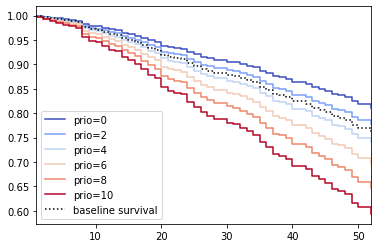

In [25]:
cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')

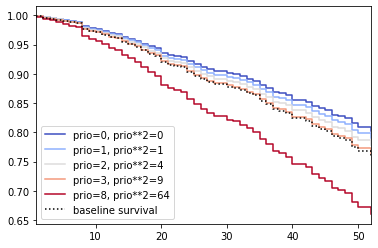

In [28]:
rossi['prio**2'] = rossi['prio'] ** 2

cph.fit(rossi, 'week', 'arrest')

cph.plot_covariate_groups(
    ['prio', 'prio**2'],
    [
        [0, 0],
        [1, 1],
        [2, 4],
        [3, 9],
        [8, 64],
    ],
    cmap='coolwarm')

In [32]:
rossi_ = datasets.load_rossi()

cph = CoxPHFitter(penalizer=0.1, l1_ratio=1.0) # sparse solutions,
cph.fit(rossi_, 'week', 'arrest')
cph.print_summary()